# Train Iris classification model

Here we're going to create a classification model for the IRIS dataset.
The first thing we want to do is import the packages we need.
Three common python packages for scientific computing are numpy, scikit-learn, and pandas.
Pandas is for loadign and managing data as tables, Numpy is for faster mathematical functions, and scikit-learn provdes us with some implementations of machine learning algorithms.
You can find information about them at their respective documentaiton sites.
- https://numpy.org/doc/stable/user/index.html#user
- https://pandas.pydata.org/docs/user_guide/10min.html
- https://scikit-learn.org/stable/user_guide.html

The first thing we need to do is import the packages we need.
**You can add the import for pandas yourself - import it as 'pd'**

Once that's done continue you can run the cell with the play button or the run all button pictured in the practical document.
Start working your way through the notebook running the cells as you go.

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## First load the data
The first thing we need to do is load the data we're going to work with and have a quick look at a summary of it.
Pandas gives us a function to read CSV files.
**You might need update the location of the dataset to point to the correct place you saved it to!**
"../" means "back one directory from where we are now"
"./" means "from where we are now"

In [178]:
df = pd.read_csv('../iris.csv')
print(df)

     sepalLength  sepalWidth  petalLength  petalWidth            type
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


## Split the data
Next we need to split the dataset into two parts, out inputs and expected outputs.
Usually these are referred to as 'X' and 'Y'.
Then we want to take a look at how many of each class there is before finally splitting the dataset into a train and test set.

It's important to keep some data away from the machine learning model for testing later - testing it on data it's already seen wouldn't be fair!
Scikit-learn gives us a helpfull function for this.
We're going to use it and tell it to keep 20% of the data back.
If you look at the table for example you'll see the first third of the dataset is all the same class, so if we had just taken the first 20% of rows we'd only have one class in the test set!
To help avoid this train_test_split will choose the rows for the 20% at random - which is important to keep it fair and avoid that problem.

In [179]:
#Pick out the columns we want to use as inputs
X = df[['sepalLength', 'sepalWidth']].values
Y = df['type'].values
## Now lets take a look at  how many rows we have
len(X)

# And how many different types in each class, we should have 50 of each
print(np.unique(Y, return_counts=True))

#Split the data and keep 20% back for testing later
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)
print("Train length", len(X_train))
print("Test length", len(X_test))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))
Train length 120
Test length 30


## Train model
Now we fit the machine learning model we're going to use to our X and Y data.

In [180]:
# model = LogisticRegression(C=1/0.1, solver="liblinear").fit(X_train, Y_train)
model = DecisionTreeClassifier(
    criterion="gini",      # or "entropy", "log_loss"
    max_depth=None,        # control depth to reduce overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
).fit(X_train, Y_train)

## Evaluate model
Now what we have a completed model we need to see how accurate it is.
The simplest way to do this is to just have it predict the output for the test data and see how many it got correct and return that as as percentage value between 0-1.

In [181]:
testPredictions = model.predict(X_test)
acc = np.average(testPredictions == Y_test)
print("Accuracy", acc)

Accuracy 0.5666666666666667


### More thourough evaluation
A more thourough evaluation method is to look at the receiver operating characteristic (ROC) curve and area under the ROC curve (AUC).
The ROC curve lets us look at how the model performs under different "thresholds".
The threshold we set lets us look at the potential trade off for the true positive rate and the fale positive rate.
Ideally we want the ROC curve to end up as close to the upper left corner (high true posite rate, low false positive rate) as we can get it.
Similarly we want the area under the curve to be as high as possible.
Like accuracy AUC is a percentage in the range 0-1.

In [182]:
Y_scores = model.predict_proba(X_test)

AUC 0.6875


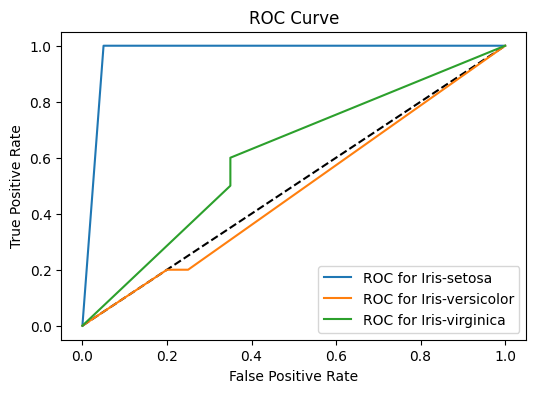

In [183]:
#Create a figure
fig = plt.figure(figsize=(6, 4))
#Set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#Plot the 50% line
plt.plot([0, 1], [0, 1], 'k--')
# plot ROC curve for the different classes
for idx, className in enumerate(df['type'].unique()):
	fpr, tpr, thresholds = roc_curve(Y_test == className, Y_scores[:,idx])
	seriesName = "ROC for " + className
	# Plot the FPR and TPR achieved by our model
	plt.plot(fpr, tpr, label=seriesName)
#Add a legend
plt.legend()

#Compute the AUC
auc = roc_auc_score(Y_test,Y_scores, multi_class='ovr')
print('AUC', auc)

## Done

That's our first experiment done and we now have a model we're happy with. Go back to the practical document to continue.